In [182]:
import functions as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [138]:
folder_name = "completion_time_jh"
completion_all_csv_data = f.load_csv_files_in_folder(folder_name)

In [139]:
# file_name = "completion_time_jh/result-prev_Truck_30_shortest.csv-now_Truck_30_LP_0_0_100_with_30_shortest.csv"
# LP_0_0_100_data = f.load_csv_file(file_name)
# LP_0_0_100_df = pd.DataFrame(LP_0_0_100_data[1:], columns=LP_0_0_100_data[0])
# LP_0_0_100_df.head()

In [140]:
import re
_columns_name = completion_all_csv_data[0][1][0]

data_list = []
    
for csv_file, csv_data in completion_all_csv_data:
    only_data = csv_data[1:]
    
    # Extract numbers after "Truck_"
    truck_numbers = re.findall(r'Truck_(\d+)', csv_file)
    
    alphas_match = re.search(r"LP_(\d+)_(\d+)_(\d+)", csv_file)
    
    if alphas_match:
        alpha1 = int(alphas_match.group(1))
        alpha2 = int(alphas_match.group(2))
        alpha3 = int(alphas_match.group(3))
        
        alphas = [alpha1, alpha2, alpha3]
        
    for row in only_data:
        row[4:] = [float(value) for value in row[4:]]
        new_row = truck_numbers + alphas + row
        data_list.append(new_row)

columns_name = ["Prev Truck Number", "Now Truck Number", "alpha_1", "alpha_2", "alpha_3"] + _columns_name

In [206]:
completion_time_jh_df = pd.DataFrame(data_list, columns=columns_name)
completion_time_jh_df.head()

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,30,30,0,0,100,Truck-8,Route-8,(425.0 0.0 205.5),(375.0 0.0 150.0),346.832,7.484,34.080
1,30,30,0,0,100,Truck-1,Route-1,(675.0 0.0 205.5),(625.0 0.0 0.0),353.932,7.488,41.184
2,30,30,0,0,100,Truck-29,Route-29,(675.0 0.0 5.5),(625.0 0.0 200.0),364.728,11.828,47.600
3,30,30,0,0,100,Truck-5,Route-5,(675.0 0.0 155.5),(125.0 0.0 200.0),369.688,7.484,56.944
4,30,30,0,0,100,Truck-19,Route-19,(175.0 0.0 205.5),(125.0 0.0 100.0),372.144,10.484,51.364


In [205]:
prev_30_now_30_jh_df = completion_time_jh_df[completion_time_jh_df["Now Truck Number"] == "30"]
prev_30_now_30_jh_df.head()

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,30,30,0,0,100,Truck-8,Route-8,(425.0 0.0 205.5),(375.0 0.0 150.0),346.832,7.484,34.080
1,30,30,0,0,100,Truck-1,Route-1,(675.0 0.0 205.5),(625.0 0.0 0.0),353.932,7.488,41.184
2,30,30,0,0,100,Truck-29,Route-29,(675.0 0.0 5.5),(625.0 0.0 200.0),364.728,11.828,47.600
3,30,30,0,0,100,Truck-5,Route-5,(675.0 0.0 155.5),(125.0 0.0 200.0),369.688,7.484,56.944
4,30,30,0,0,100,Truck-19,Route-19,(175.0 0.0 205.5),(125.0 0.0 100.0),372.144,10.484,51.364


In [179]:
# Assuming you have your DataFrame named 'df'
# You can read your data from a CSV file or any other source

# Grouping by alpha_1, alpha_2, and alpha_3
grouped_prev_30_now_30_jh_df = prev_30_now_30_jh_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

selected_rows = []

for (alpha_1, alpha_2, alpha_3), group in grouped_prev_30_now_30_jh_df:
    
    
    # Filter the group to select rows with Truck_id less than 100#
    less_than_100 = group[group['Truck_id'].str.extract(r'Truck-(\d+)', expand = False).astype(int) < 100]

    # Select row with the largest Total Time for Truck_id less than 100
    if not less_than_100.empty:
        max_time_row_lt_100 = less_than_100.loc[less_than_100['Total Time'].idxmax()]
        selected_rows.append(max_time_row_lt_100)
    
    # Select rows with the largest Total Time for Truck_id greater than or equal to 100
    greater_than_100 = group[group['Truck_id'].str.extract(r'Truck-(\d+)', expand = False).astype(int) >= 100]

    if not greater_than_100.empty:
        # max_time_rows_gt_100 = greater_than_100.nlargest(2, 'Total Time')
        max_time_rows_gt_100 = greater_than_100.loc[greater_than_100['Total Time'].idxmax()]
        selected_rows.append(max_time_rows_gt_100)

# Create a new DataFrame from the selected rows
prev_30_now_30_Max_Completion_time_jh_df = pd.DataFrame(selected_rows, columns=prev_30_now_30_jh_df.columns)

# Print the selected DataFrame
prev_30_now_30_Max_Completion_time_jh_df.reset_index(drop=True, inplace=True)
prev_30_now_30_Max_Completion_time_jh_df.head()

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,30,30,0,0,100,Truck-23,Route-23,(425.0 0.0 55.5),(625.0 0.0 200.0),461.344,34.900,121.456
1,30,30,0,0,100,Truck-121,Route-121,(675.0 0.0 105.5),(625.0 0.0 100.0),494.400,120.052,68.368
2,30,30,10,80,10,Truck-0,Route-0,(175.0 0.0 105.5),(125.0 0.0 200.0),442.900,36.248,101.656
3,30,30,10,80,10,Truck-107,Route-107,(675.0 0.0 105.5),(625.0 0.0 0.0),489.628,125.332,59.308
4,30,30,20,70,10,Truck-27,Route-27,(675.0 0.0 105.5),(625.0 0.0 200.0),445.328,84.172,56.164


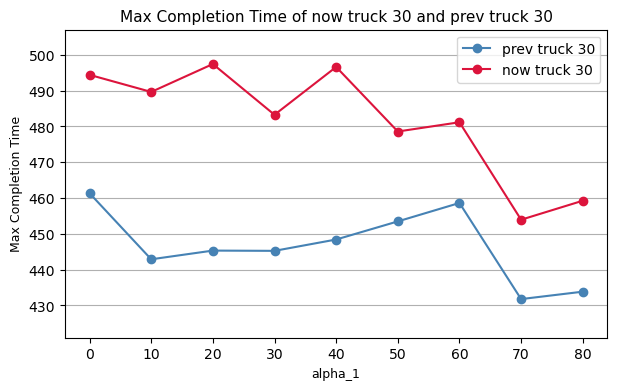

In [214]:
# index가 짝수인 행만 선택 
# 이전에 스케줄링 된 트럭
x_value_1 = prev_30_now_30_Max_Completion_time_jh_df.iloc[::2, :]["alpha_1"]
y_value_1 = prev_30_now_30_Max_Completion_time_jh_df.iloc[::2, :]["Total Time"]

# 현재 스케줄링 대상 트럭
x_value_2 = prev_30_now_30_Max_Completion_time_jh_df.iloc[1::2, :]["alpha_1"]
y_value_2 = prev_30_now_30_Max_Completion_time_jh_df.iloc[1::2, :]["Total Time"]

# 그래프 그리기
plt.figure(figsize=(7,4))
plt.plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'steelblue')
plt.plot(x_value_2, y_value_2 , marker='o', linestyle='-', color = 'crimson')
plt.title("Max Completion Time of now truck 30 and prev truck 30", fontsize=11, ha='center')

plt.xlabel("alpha_1", fontsize=9)
plt.ylabel("Max Completion Time", fontsize=9)

# _y_values = np.concatenate((y_value_1, y_value_2), axis=None)
plt.ylim(int(_y_values.min()) - 10, int(_y_values.max()) + 10)
# plt.yticks(range(0, int(_y_values.max()) + 100, 100))

plt.legend(["prev truck 30", "now truck 30"], loc='upper right')
plt.grid(True, axis='y')
plt.show()


In [207]:
prev_30_now_40_jh_df = completion_time_jh_df[completion_time_jh_df["Now Truck Number"] == "40"]
prev_30_now_40_jh_df.head()

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
540,30,40,0,0,100,Truck-8,Route-8,(425.0 0.0 205.5),(375.0 0.0 150.0),346.628,7.716,33.912
541,30,40,0,0,100,Truck-1,Route-1,(675.0 0.0 205.5),(625.0 0.0 0.0),357.060,7.720,44.336
542,30,40,0,0,100,Truck-5,Route-5,(675.0 0.0 155.5),(125.0 0.0 200.0),362.480,7.716,49.784
543,30,40,0,0,100,Truck-29,Route-29,(675.0 0.0 5.5),(625.0 0.0 200.0),364.360,11.948,46.408
544,30,40,0,0,100,Truck-18,Route-18,(675.0 0.0 205.5),(375.0 0.0 100.0),362.608,10.696,43.912


In [211]:
# Grouping by alpha_1, alpha_2, and alpha_3
grouped_prev_30_now_40_jh_df = prev_30_now_40_jh_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

selected_rows = []

for (alpha_1, alpha_2, alpha_3), group in grouped_prev_30_now_40_jh_df:
    
    
    # Filter the group to select rows with Truck_id less than 100#
    less_than_100 = group[group['Truck_id'].str.extract(r'Truck-(\d+)', expand = False).astype(int) < 100]

    # Select row with the largest Total Time for Truck_id less than 100
    if not less_than_100.empty:
        max_time_row_lt_100 = less_than_100.loc[less_than_100['Total Time'].idxmax()]
        selected_rows.append(max_time_row_lt_100)
    
    # Select rows with the largest Total Time for Truck_id greater than or equal to 100
    greater_than_100 = group[group['Truck_id'].str.extract(r'Truck-(\d+)', expand = False).astype(int) >= 100]

    if not greater_than_100.empty:
        # max_time_rows_gt_100 = greater_than_100.nlargest(2, 'Total Time')
        max_time_rows_gt_100 = greater_than_100.loc[greater_than_100['Total Time'].idxmax()]
        selected_rows.append(max_time_rows_gt_100)

# Create a new DataFrame from the selected rows
prev_30_now_40_Max_Completion_time_jh_df = pd.DataFrame(selected_rows, columns=prev_30_now_40_jh_df.columns)

# Print the selected DataFrame
prev_30_now_40_Max_Completion_time_jh_df.reset_index(drop=True, inplace=True)
prev_30_now_40_Max_Completion_time_jh_df.head()

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,30,40,0,0,100,Truck-27,Route-27,(675.0 0.0 105.5),(625.0 0.0 200.0),446.372,72.580,65.800
1,30,40,0,0,100,Truck-108,Route-108,(425.0 0.0 5.5),(625.0 0.0 100.0),468.712,56.880,106.840
2,30,40,20,70,10,Truck-23,Route-23,(425.0 0.0 55.5),(625.0 0.0 200.0),446.232,34.924,106.320
3,30,40,20,70,10,Truck-118,Route-118,(675.0 0.0 5.5),(625.0 0.0 200.0),470.272,108.744,56.544
4,30,40,30,60,10,Truck-23,Route-23,(425.0 0.0 55.5),(625.0 0.0 200.0),443.904,34.916,103.972


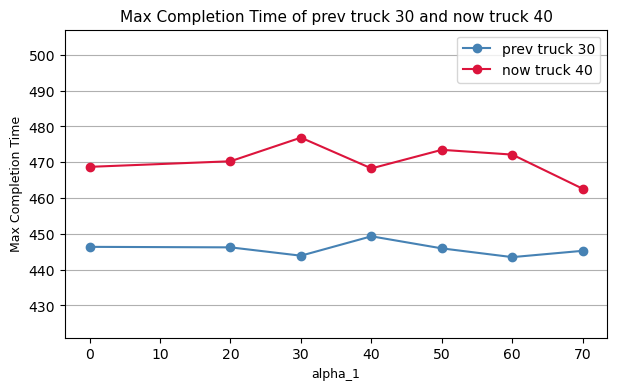

In [213]:
# index가 짝수인 행만 선택 
# 이전에 스케줄링 된 트럭
x_value_1 = prev_30_now_40_Max_Completion_time_jh_df.iloc[::2, :]["alpha_1"]
y_value_1 = prev_30_now_40_Max_Completion_time_jh_df.iloc[::2, :]["Total Time"]

# 현재 스케줄링 대상 트럭
x_value_2 = prev_30_now_40_Max_Completion_time_jh_df.iloc[1::2, :]["alpha_1"]
y_value_2 = prev_30_now_40_Max_Completion_time_jh_df.iloc[1::2, :]["Total Time"]

# 그래프 그리기
plt.figure(figsize=(7,4))
plt.plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'steelblue')
plt.plot(x_value_2, y_value_2 , marker='o', linestyle='-', color = 'crimson')
plt.title("Max Completion Time of prev truck 30 and now truck 40", fontsize=11, ha='center')

plt.xlabel("alpha_1", fontsize=9)
plt.ylabel("Max Completion Time", fontsize=9)

# _y_values = np.concatenate((y_value_1, y_value_2), axis=None)
plt.ylim(int(_y_values.min()) - 10, int(_y_values.max()) + 10)
# plt.yticks(range(0, int(_y_values.max()) + 100, 100))

plt.legend(["prev truck 30", "now truck 40"], loc='upper right')
plt.grid(True, axis='y')
plt.show()